# K-means clustering on subset of the data

## Preparation

In [2]:
import pandas as pd
import pickle as pkl
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from random import seed
from random import randint

In [3]:
seed(1)

### Import GO data

In [4]:
with open('../processed_data/geneOntologyDataset.pkl', 'rb') as inp:
    [pivoted, tfidfPivoted] = pkl.load(inp)

In [5]:
GOdata = pd.DataFrame(tfidfPivoted['P'].todense()) # F / P / C
GOdata['Standard Name'] = pivoted['P'].index

### Import FI data

In [6]:
FIdata = pd.read_excel('../raw_data/41592_2018_45_MOESM4_ESM.xlsx', skiprows = 6, engine = 'openpyxl')
full_data = pd.merge(GOdata, FIdata, on = 'Standard Name', how = 'left')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
full_data = full_data.loc[full_data.intensity.notna()]

### Filter data

In [8]:
full_data = full_data.sort_values('intensity')

In [9]:
random = np.ones(100)
for i in range(100):
    random[i] = randint(100, len(full_data)-100)

In [10]:
top = full_data.iloc[0:100, :]
middle = full_data.iloc[random, :]
bottom = full_data.iloc[-100:, :]
full = pd.concat([top, middle, bottom])

In [11]:
clust_data = full.iloc[:,0:full.columns.get_loc('Standard Name')]

## Clustering

### Get optimal number of clusters

In [12]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18.5, 10.5)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


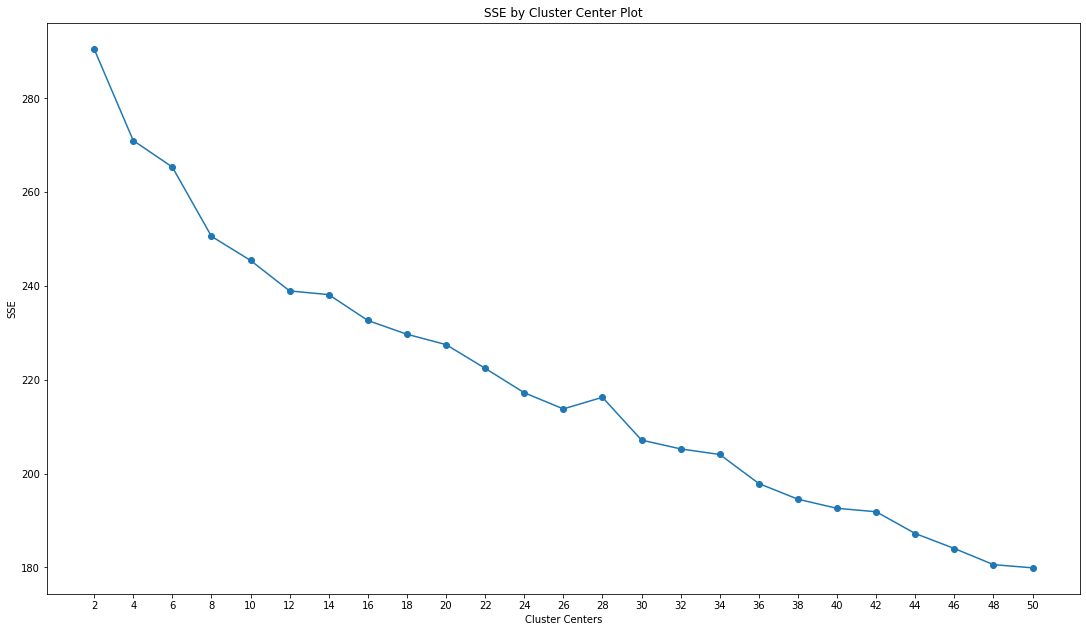

In [14]:
find_optimal_clusters(clust_data, 50)

### Perform clustering with optimal K

In [43]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(clust_data)

### Plotting the clusters: PCA

In [44]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clust_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

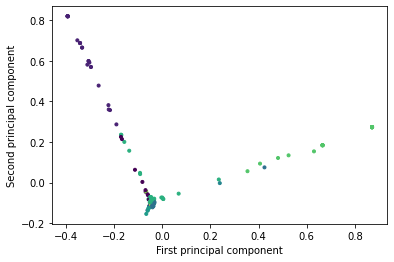

In [45]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1, principalDf.PC2, marker = '.', c = clusters)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
plt.show()

### plot FI in PC plot

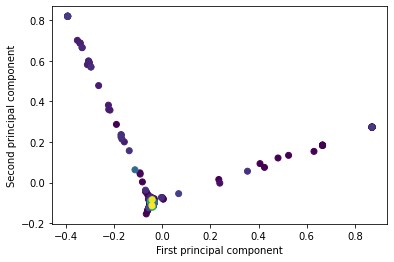

In [46]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1, principalDf.PC2, c = full.intensity)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
plt.show()

### Plotting the clusters: t-SNE

In [47]:
tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(clust_data))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


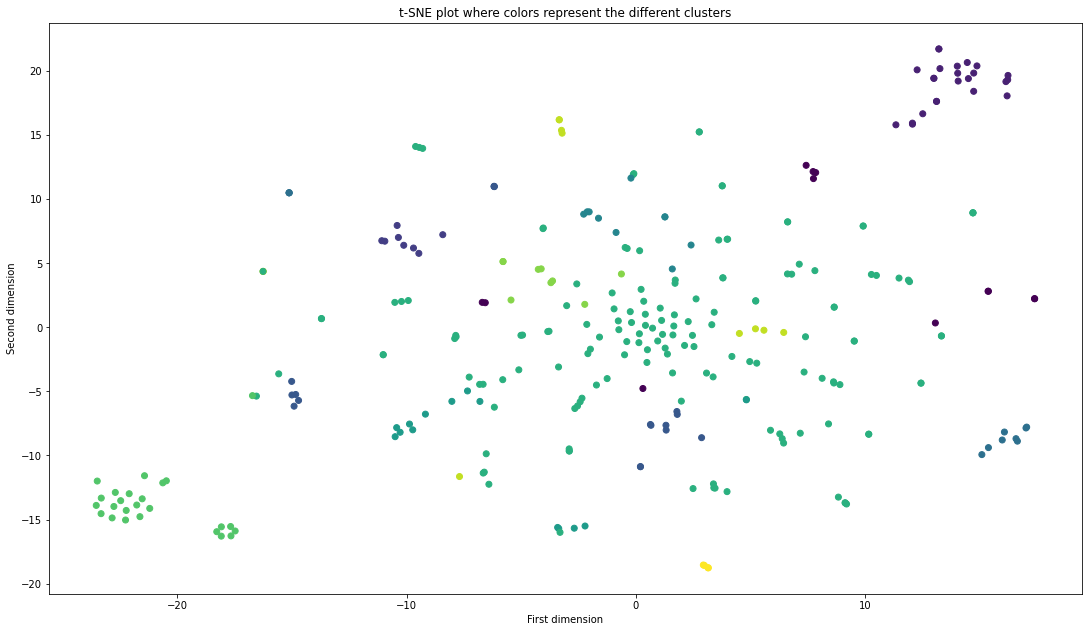

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(tsne[:,0], tsne[:,1], c = clusters)
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
ax.set_title('t-SNE plot where colors represent the different clusters')
plt.show()

### plot FI in t-SNE plot

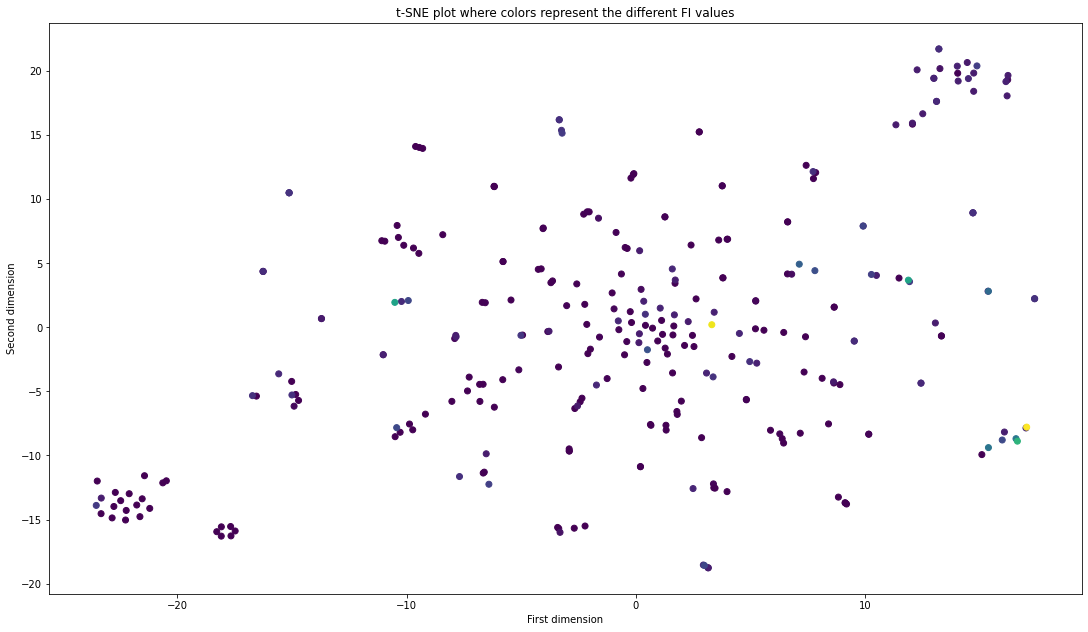

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(tsne[:,0], tsne[:,1], c = full.intensity)
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
ax.set_title('t-SNE plot where colors represent the different FI values')
plt.show()

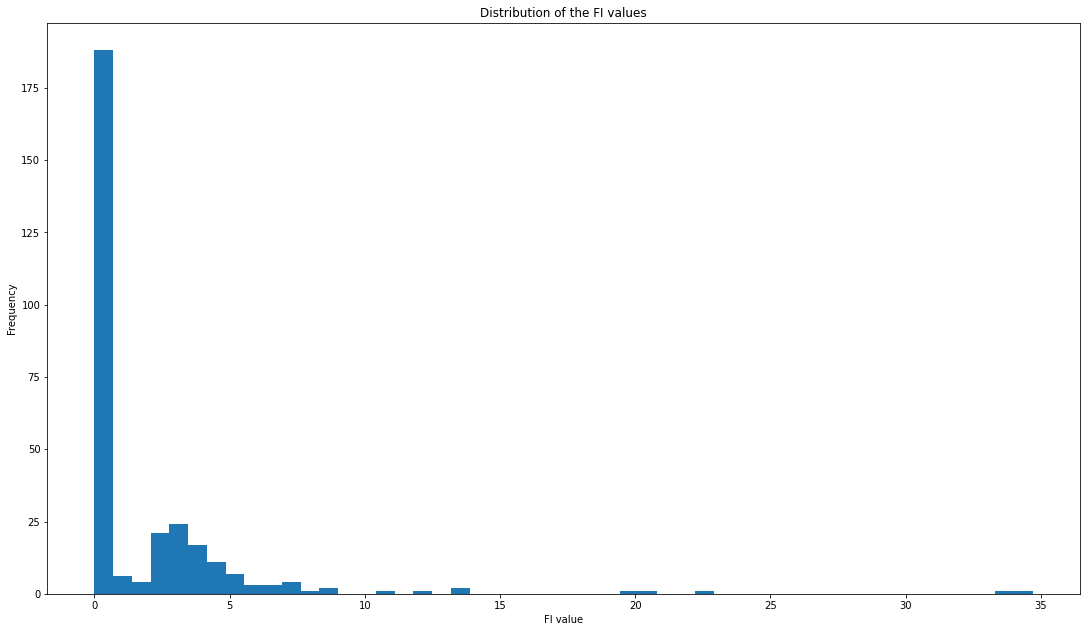

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.hist(full.intensity, bins = 50)
ax.set_title('Distribution of the FI values')
ax.set_xlabel('FI value')
ax.set_ylabel('Frequency')
plt.show()